# Практический проект по анализу данных 

Проанализируем активность студентов онлайн курса [Введение в анализ данных в R](https://stepik.org/course/129/syllabus).

Описание данных:

**events_train.csv** - данные о действиях, которые совершают студенты со стэпами:

1. **step_id** - id стэпа
2. **user_id** - анонимизированный id юзера
3. **timestamp** - время наступления события в формате unix date
4. **action** - событие, возможные значения: 
    - discovered - пользователь перешел на стэп
    - viewed - просмотр шага,
    - started_attempt - начало попытки решить шаг, ранее нужно было явно нажать на кнопку - начать решение, перед тем как приступить к решению практического шага
    - passed - удачное решение практического шага

**submissions_train.csv** - данные о времени и статусах сабмитов к практическим задания

1. **step_id** - id стэпа
2. **timestamp** - время отправки решения в формате unix date
3. **submission_status** - статус решения
4. **user_id** - анонимизированный id юзера





In [1]:
import pandas as pd
import numpy as np

C:\Users\806263\Anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
% matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set(rc={'figure.figsize': (9, 6)})

In [4]:
events_data = pd.read_csv('data/event_data_train.zip', compression='zip')

In [5]:
events_data.head()

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632


Немного поизучаем данные и добавим столбцы **date** и **day**.

In [6]:
events_data.action.unique()

array(['viewed', 'passed', 'discovered', 'started_attempt'], dtype=object)

In [7]:
events_data['date'] = pd.to_datetime(events_data.timestamp, unit='s')
events_data.head()

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35


In [8]:
events_data.dtypes

step_id               int64
timestamp             int64
action               object
user_id               int64
date         datetime64[ns]
dtype: object

In [9]:
events_data['day'] = events_data.date.dt.date

Посчитаем сколько уникальных пользователей посещают курс в каждый заданный день. Для этого сгруппируем данные по столбцу **day** и воспользуемся функцией `nunique`.

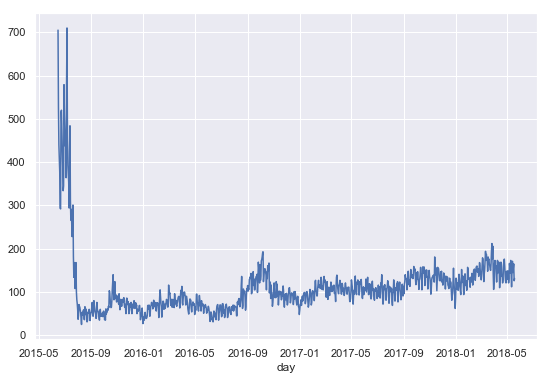

In [10]:
events_data.groupby('day').user_id.nunique().plot()

Теперь сгруппируем данные по пользователям и построим гистограмму количества пройденных степов. Не забываем переименовать колонку `step_id` в корректную для данного контекста `passed_steps`.

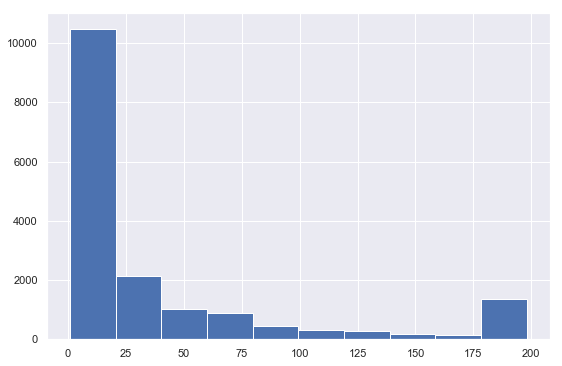

In [11]:
events_data[events_data.action  == 'passed'].groupby('user_id', as_index=False)\
        .agg({'step_id': 'count'})\
        .rename(columns={'step_id': 'passed_steps'}).passed_steps.hist()

Казалось бы, график построен верно. Однако заметим, что при построении гистограммы мы не учли пользователей, которые записались на курс, но не прошли ни один степ. Вспользуемся функцией создания сводных таблиц - `pivot_table`, для более правильного решения.

In [77]:
users_events_data = events_data.pivot_table(index='user_id',
                                                      columns='action',
                                                      values='step_id', 
                                                      aggfunc='count', 
                                                      fill_value=0)
users_events_data.head()

action,discovered,passed,started_attempt,viewed
user_id,,,,
1,1,0,0,1
2,9,9,2,10
3,91,87,30,192
5,11,11,4,12
7,1,1,0,1


Обычно не очень удобно, когда в качестве индексов используется одна из колонок с данными. Поэтому исправим представление данных с помощью `reset_index`.

In [78]:
users_events_data = users_scores_in_events_data.reset_index()
users_events_data.head()

,index,user_id,discovered,passed,started_attempt,viewed
0,0,1,1,0,0,1
1,1,2,9,9,2,10
2,2,3,91,87,30,192
3,3,5,11,11,4,12
4,4,7,1,1,0,1


In [82]:
print(users_events_data.columns.name) 
users_events_data.columns.name = ''
users_events_data.head()

,index,user_id,discovered,passed,started_attempt,viewed
0,0,1,1,0,0,1
1,1,2,9,9,2,10
2,2,3,91,87,30,192
3,3,5,11,11,4,12
4,4,7,1,1,0,1


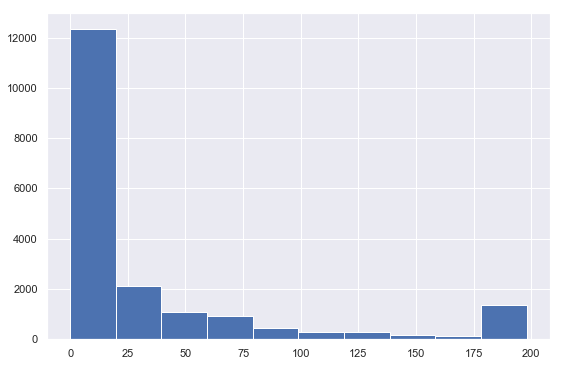

In [81]:
users_events_data.passed.hist()

Итак, видим, что гистограмма получилось чуть другой, т.к. теперь мы учли пользователей, которые не прошли ни одного степа.

Такую же сводную таблицу построим для файла `submissions_data.csv`.

In [16]:
submissions_data = pd.read_csv('data/submissions_data_train.zip', compression='zip')

In [17]:
submissions_data['date'] = pd.to_datetime(submissions_data.timestamp, unit='s')
submissions_data.head()
submissions_data['day'] = submissions_data.date.dt.date
submissions_data.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


In [18]:
users_scores_in_submissions = submissions_data.pivot_table(index='user_id', 
                                            columns='submission_status',
                                            values='step_id',
                                            aggfunc='count', 
                                            fill_value=0).reset_index()

In [19]:
users_scores_in_submissions.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


Поставим конкретную задачу для анализа. Наша глобальная цель - предсказывать тех пользователей, которые покидают курс, не пройдя его до конца. Что для этого можно сделать? Заметим для начала, что важно разделять пользователей, которые временно приостановили прохождение курса, но планируют вернуться и пользователей, которые уже точно не вернутся на курс. Как можно отличить одних от других? Например, мы можем исследовать активность пользователя с течением времени, и в случае, если на протяжении $n$ дней пользователь не возвращался к курсу, то будем считать, что он уже не вернется. Попробуем определить, чему должно равняться $n$.

Для этого сначала рассчитаем для каждого пользователя длительность перерывов между активностями на курсе. Далее посмотрим на картину в целом по всем пользователям и примем какое-то статистическое решение о том какую величину $n$ можно считать пороговой, чтобы относить пользователя к категории покинувших курс.


In [20]:
gap_data = events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day'])\
    .groupby('user_id')['timestamp'].apply(list)\
    .apply(np.diff).values
gap_data

array([array([], dtype=int32), array([4843602]),
       array([6899249,  182484,   93710, 2768870,  171400,   78712]), ...,
       array([   86128,   136759,    94899,  1422583, 14347289,   505061,
          98252,    57019]),
       array([1567990]), array([], dtype=int32)], dtype=object)

Теперь объединим все данные в один массив, где каждый элемент будет представлять собой длительность промежутка бездействия пользователя (в днях) и построим гистограмму.

In [21]:
gap_data = pd.Series(np.concatenate(gap_data, axis=0))
gap_data = gap_data/ (24*60*60)
gap_data[:10]

0     56.060208
1     79.852419
2      2.112083
3      1.084606
4     32.047106
5      1.983796
6      0.911019
7    390.078843
8      9.994028
9      0.589468
dtype: float64

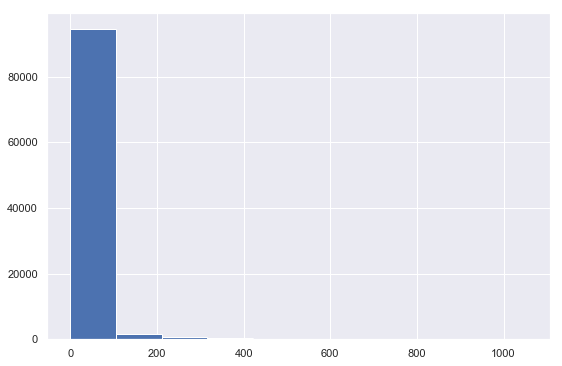

In [22]:
gap_data.hist()

График получился не очень содержательный, т.к. у нас есть большие выбросы. Это частая проблема, поэтому необходимо отфильтровать данные от выбросов. Для этого уберем совсем большие наблюдения (те, у которых перерыв больше 200 дней).

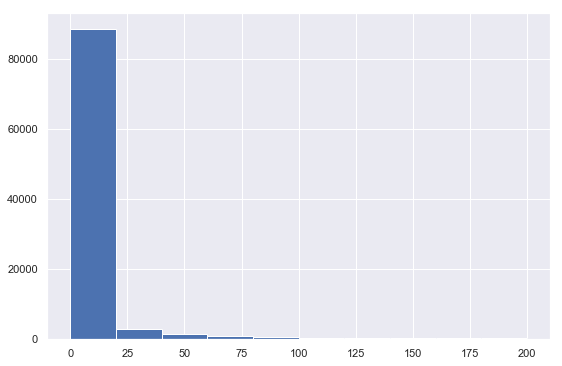

In [23]:
gap_data[gap_data < 200].hist()

Посмотрим какой порог времени бездействия не превышают 90% и 95% пользователей.

In [24]:
print(gap_data.quantile(0.95), "дней")
print(gap_data.quantile(0.90), "дней")

59.760440972222156 дней
18.325995370370403 дней


Итак, получили, что величина перерывов у 95% пользователей укладывается в 59 дней, а у 90% пользователей в 18 дней. На основании этих данных возьмем, скажем, 30 дней в качестве порогового значения промежутка бездействия.

Итак, давайте теперь разметим наших пользователей по принципу того являются ли они уже "дропнувшимися" или нет. При этом нужно понимать, что если пользователь долгое время не появляется на курсе, но при этом курс уже им пройден, то такого пользователя нельзя считать "дронувшимся".

Имеем составное условие: если человек еще не получил сертификат и при этом более 30 дней отсутствует на платформе, то помечаем его, как покинувшего курс.


In [46]:
events_data.tail()

,step_id,timestamp,action,user_id,date,day
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19
3480702,33892,1526772811,viewed,18526,2018-05-19 23:33:31,2018-05-19


В переменную `now` запишем время (`timestamp`) последнего события среди всех пользователей. В переменную `dropout_threshold` - значение 30 дней в линуксовом формате времени.

In [57]:
now = events_data['timestamp'].max()
dropout_threshold = 30 * 24 * 60 * 60
print('Time now:', now, '\nDropout threshold:', dropout_threshold)

Time now: 1526772811 
Dropout threshold: 2592000


In [50]:
users_data = events_data.groupby('user_id', as_index=False).\
            aggregate({'timestamp': 'max'}).rename(columns = {'timestamp': 'last_timestamp'})
users_data.head()

,user_id,last_timestamp
0,1,1472827464
1,2,1519226966
2,3,1444581588
3,5,1499859939
4,7,1521634660


In [61]:
users_data['is_gone_user'] = (now - user_data.last_timestamp) > dropout_threshold
users_data.head()

,user_id,last_timestamp,is_gone_user
0,1,1472827464,True
1,2,1519226966,True
2,3,1444581588,True
3,5,1499859939,True
4,7,1521634660,True


Присоединим к полученной таблице датафрейм с числом попыток решения степов и числом набранных баллов.

In [65]:
users_scores_in_submissions.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [73]:
users_data = users_data.merge(users_scores_in_submissions, on='user_id', how='outer')
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong
0,1,1472827464,True,NaN,NaN
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,NaN,NaN


In [83]:
users_data = users_data.fillna(0)
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong
0,1,1472827464,True,0.0,0.0
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,0.0,0.0


К полученной таблице присоединим еще один датафрейм с информацией о прочих действиях пользователя.

In [85]:
users_data = users_data.merge(users_events_data, how='outer')
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,index,discovered,passed,started_attempt,viewed
0,1,1472827464,True,0.0,0.0,0,1,0,0,1
1,2,1519226966,True,2.0,0.0,1,9,9,2,10
2,3,1444581588,True,29.0,23.0,2,91,87,30,192
3,5,1499859939,True,2.0,2.0,3,11,11,4,12
4,7,1521634660,True,0.0,0.0,4,1,1,0,1


Добавим еще один столбец с количеством дней, проведенных на курсе для каждого пользователя.

In [88]:
users_days = events_data.groupby('user_id').day.nunique().to_frame().reset_index()
users_days.head()

,user_id,day
0,1,1
1,2,2
2,3,7
3,5,2
4,7,1


In [90]:
users_data = users_data.merge(users_days, how='outer')
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,index,discovered,passed,started_attempt,viewed,day
0,1,1472827464,True,0.0,0.0,0,1,0,0,1,1
1,2,1519226966,True,2.0,0.0,1,9,9,2,10,2
2,3,1444581588,True,29.0,23.0,2,91,87,30,192,7
3,5,1499859939,True,2.0,2.0,3,11,11,4,12,2
4,7,1521634660,True,0.0,0.0,4,1,1,0,1,1


Обязательно проверям, что мы никого не потеряли.

In [92]:
print(users_data.user_id.nunique(), ' is equal', events_data.user_id.nunique())

19234  is equal 19234


Заведем еще одну колонку в данных, показывающие успешно ли пользователь закончил курс.

In [94]:
users_data['passed_course'] = users_data.passed > 170
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,index,discovered,passed,started_attempt,viewed,day,passed_course
0,1,1472827464,True,0.0,0.0,0,1,0,0,1,1,False
1,2,1519226966,True,2.0,0.0,1,9,9,2,10,2,False
2,3,1444581588,True,29.0,23.0,2,91,87,30,192,7,False
3,5,1499859939,True,2.0,2.0,3,11,11,4,12,2,False
4,7,1521634660,True,0.0,0.0,4,1,1,0,1,1,False


In [95]:
users_data.groupby('passed_course').count()

,user_id,last_timestamp,is_gone_user,correct,wrong,index,discovered,passed,started_attempt,viewed,day
passed_course,,,,,,,,,,,
False,17809,17809,17809,17809,17809,17809,17809,17809,17809,17809,17809
True,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425


Найдем процент пользователей, успешно прошедших курс.

In [119]:
print('Успешно прошло курс {0:.2}% пользователей'.format(100*1425/(17809 + 1425)))

Успешно прошло курс 7.4% пользователей
